In [1]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_original = pd.read_csv(r"C:\Users\Ethan\Downloads\loan_sanction_train.csv")
train = train_original.copy()
train.head()

test_original = pd.read_csv(r"C:\Users\Ethan\Downloads\loan_sanction_test.csv")
test = test_original.copy()

In [3]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)

In [4]:
train = train.dropna()
nulls = train.isnull().sum()
print(nulls)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [5]:
#Drop Loan_ID:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

#Encode Gender M/F into 1/0:
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)
test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

#Encode Married Y/N into 1/0:
train['Married'].replace('Yes',1,inplace=True)
train['Married'].replace('No',0,inplace=True)
test['Married'].replace('Yes',1,inplace=True)
test['Married'].replace('No',0,inplace=True)

#Encode Dependents into numerical data:
train['Dependents'].replace('0',0,inplace=True)
test['Dependents'].replace('0',0,inplace=True)
train['Dependents'].replace('1',1,inplace=True)
test['Dependents'].replace('1',1,inplace=True)
train['Dependents'].replace('2',2,inplace=True)
test['Dependents'].replace('2',2,inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

#Encode Education Graduate/Not Graduate into 1/0
train['Education'].replace('Graduate',1,inplace = True)
train['Education'].replace('Not Graduate',0,inplace = True)
test['Education'].replace('Graduate',1,inplace = True)
test['Education'].replace('Not Graduate',0,inplace = True)

#Encode Self-Employed Y/N into 1/0:
train['Self_Employed'].replace('Yes',1,inplace = True)
train['Self_Employed'].replace('No',0,inplace = True)
test['Self_Employed'].replace('Yes',1,inplace = True)
test['Self_Employed'].replace('No',0,inplace = True)

#Encode Property_Area values Rural, Semiurban, Urban into 0/1/2:
train['Property_Area'].replace('Rural',0,inplace = True)
train['Property_Area'].replace('Semiurban',1,inplace = True)
train['Property_Area'].replace('Urban',2,inplace = True)
test['Property_Area'].replace('Rural',0,inplace = True)
test['Property_Area'].replace('Semiurban',1,inplace = True)
test['Property_Area'].replace('Urban',2,inplace = True)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



Binning

In [7]:
#X = train.drop('Loan_Status', axis=1)
train2 = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']
bins=[150, 2877.5, 3812.5, 5403.459, 5795.00,81000]
X_original = train2.drop(columns=['ApplicantIncome'])  # Assuming 'Values' is the column you're binning
X_binned = pd.cut(train2['ApplicantIncome'], bins=bins, labels=False)  # Binning 'Values' column
X = pd.concat([X_original,X_binned], axis = 1)
X['ApplicantIncome'].fillna(X['ApplicantIncome'].median(),inplace=True)
#Note: The test csv file actually doesn't have a Loan Status column, so it's worthless as far as making predictions go. Instead, let's split our trianing data.
#X_test = test.drop('Loan_Status', axis = 1)
#y_test = test['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.34)

Accuracy: 0.78
Cross-Validation Scores: [0.79166667 0.8125     0.77083333 0.79166667 0.77083333 0.77083333
 0.83333333 0.85416667 0.8125     0.85416667]
Mean Accuracy: 0.80625

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.38      0.54        55
           1       0.76      0.98      0.86       109

    accuracy                           0.78       164
   macro avg       0.84      0.68      0.70       164
weighted avg       0.81      0.78      0.75       164


Confusion Matrix:
[[ 21  34]
 [  2 107]]


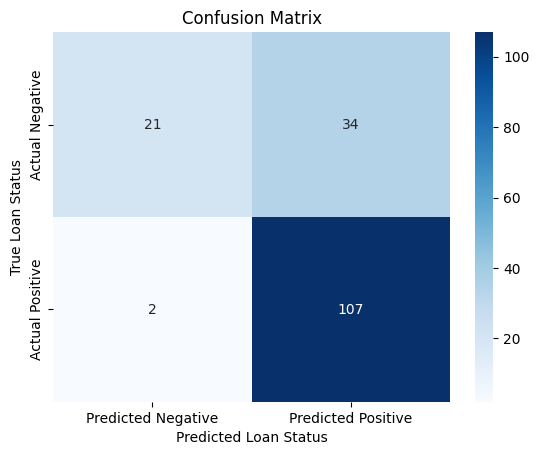

              Feature  Importance
8      Credit_History        0.39
6          LoanAmount        0.24
9       Property_Area        0.16
7    Loan_Amount_Term        0.14
5   CoapplicantIncome        0.07
0              Gender        0.00
1             Married        0.00
2          Dependents        0.00
3           Education        0.00
4       Self_Employed        0.00
10    ApplicantIncome        0.00


In [8]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=100,learning_rate = 0.05, random_state=42)
bagging_adaboost_model = BaggingClassifier(base_estimator=adaboost_model, n_estimators=10, random_state=42)
adaboost_model.fit(X_train, y_train)
#bagging_adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
#y_pred = bagging_adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cv_scores = cross_val_score(adaboost_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Loan Status')
plt.ylabel('True Loan Status')
plt.show()

feature_importances = adaboost_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

In [9]:
from xgboost import XGBClassifier

Accuracy: 0.77
Cross-Validation Scores: [0.79166667 0.8125     0.77083333 0.79166667 0.77083333 0.77083333
 0.85416667 0.85416667 0.8125     0.85416667]
Mean Accuracy: 0.8083333333333332

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.36      0.52        55
           1       0.75      0.98      0.85       109

    accuracy                           0.77       164
   macro avg       0.83      0.67      0.69       164
weighted avg       0.81      0.77      0.74       164


Confusion Matrix:
[[ 20  35]
 [  2 107]]
              Feature  Importance
8      Credit_History    0.826727
9       Property_Area    0.080725
7    Loan_Amount_Term    0.071016
6          LoanAmount    0.021531
0              Gender    0.000000
1             Married    0.000000
2          Dependents    0.000000
3           Education    0.000000
4       Self_Employed    0.000000
5   CoapplicantIncome    0.000000
10    ApplicantIncome    0.000000


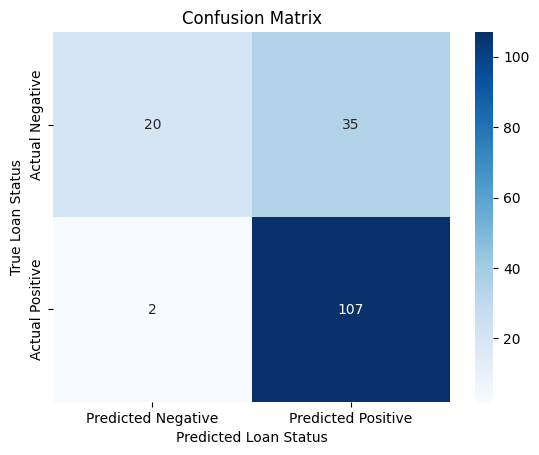

In [10]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cv_scores = cross_val_score(xgb_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

feature_importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Loan Status')
plt.ylabel('True Loan Status')
plt.show()